# **Startup Success Prediction**
# **Can you predict if a start-up will succeed or fail **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/jeevanjagadish/ML-Predictions-Projects/master/Startup_Success_Prediction/startup%20data.csv")
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:

df.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
zip_code                      0
age_first_funding_year        0
milestones                    0
funding_total_usd             0
funding_rounds                0
dtype: int64

In [6]:

print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))

Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [7]:
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)
df.drop(["closed_at"], axis=1, inplace=True)

In [8]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [9]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [10]:
df=pd.get_dummies(df, columns=["status"], drop_first=True)

In [11]:
df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

df.head(3)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,0
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,0
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,0


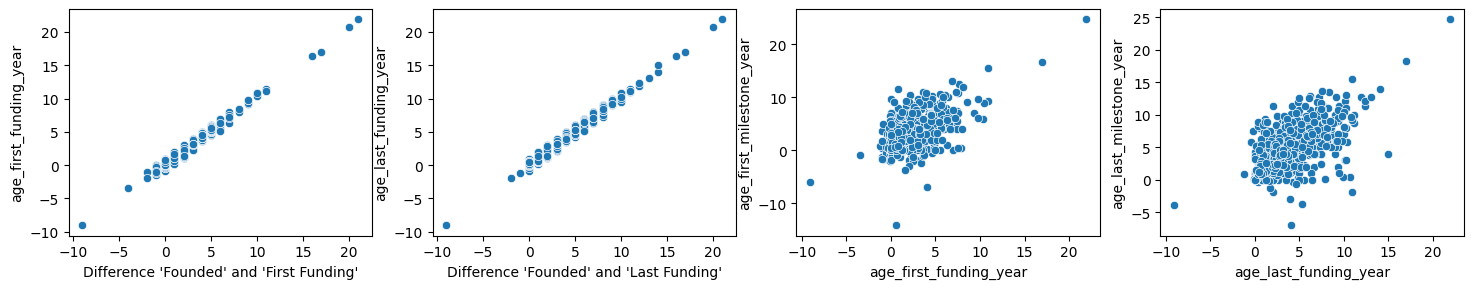

In [13]:

plt.figure(figsize=(18,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot((df["first_funding_at"].dt.year - df["founded_at"].dt.year), df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1,4,2)
sns.scatterplot((df["last_funding_at"].dt.year- df["founded_at"].dt.year), df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1,4,3)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"]);

In [14]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [15]:
for index, rows in df.iterrows():
    if rows["age_first_funding_year"]<0:
        print(index, rows["age_first_funding_year"])

23 -1.0
32 -0.1671
71 -0.0301
79 -0.5836
80 -0.0219
104 -0.4959
122 -0.7479
127 -1.011
234 -0.2466
240 -1.0521
263 -1.9863
284 -0.0849
312 -0.4192
340 -0.4986
368 -0.13699999999999998
379 -0.0027
382 -0.4466
397 -0.1671
407 -0.0219
420 -0.3342
431 -1.4712
432 -1.0
466 -0.1808
488 -0.0438
489 -1.1836
499 -0.1288
513 -0.1616
518 -0.2493
536 -0.9178
558 -9.0466
566 -0.2384
567 -0.0082
584 -3.5068
603 -0.0027
609 -0.1534
702 -0.5014
720 -0.1041
763 -0.4959
782 -0.0192
785 -0.1151
788 -0.2521
830 -0.0822
831 -0.8658
847 -1.0
851 -0.3288
875 -0.1671


In [16]:
df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

In [17]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


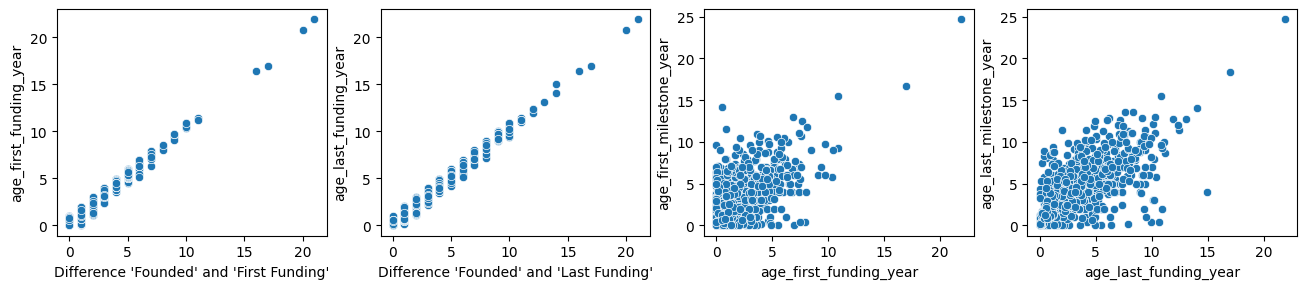

In [18]:

plt.figure(figsize=(16,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot(np.abs(df["first_funding_at"].dt.year - df["founded_at"].dt.year), df["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1,4,2)
sns.scatterplot(np.abs(df["last_funding_at"].dt.year- df["founded_at"].dt.year), df["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1,4,3)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"]);

In [19]:

df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()), inplace=True)
df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()), inplace=True)

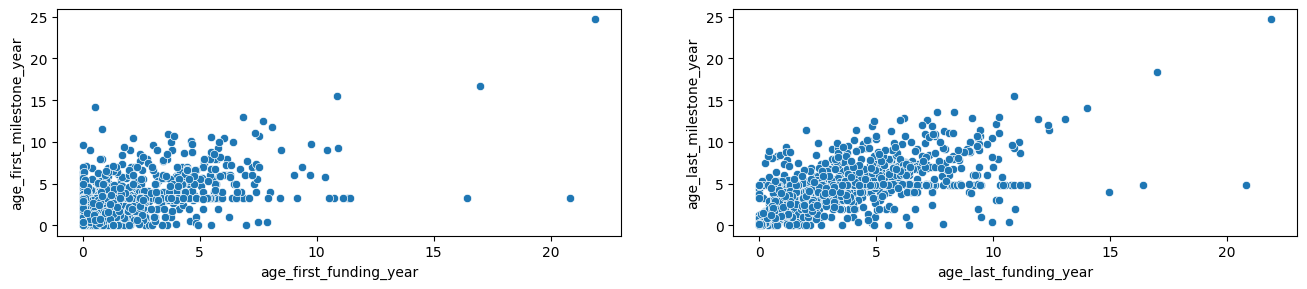

In [20]:

plt.figure(figsize=(16,3),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,2,2)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"]);


In [21]:
df.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2.304274,3.963252,3.227575,4.817909,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.353196
std,3.741497,22.394167,0.478222,2.447524,2.925268,2.548902,2.847542,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.000000,0.593150,1.736950,1.349300,2.969850,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.000000,1.471200,3.545200,3.227575,4.817909,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000
75%,40.730646,-77.214731,1.000000,3.583550,5.561600,4.002700,6.058900,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


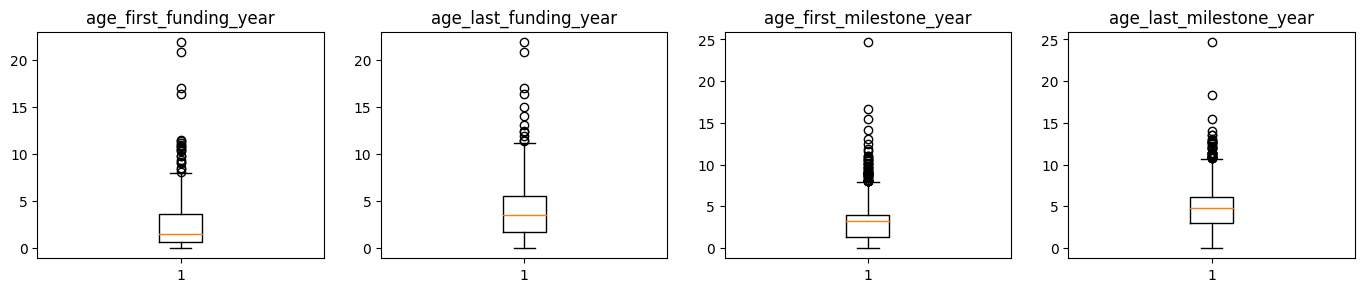

In [22]:

variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(17,3),dpi=100)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    plt.boxplot(df[variable[i]]);

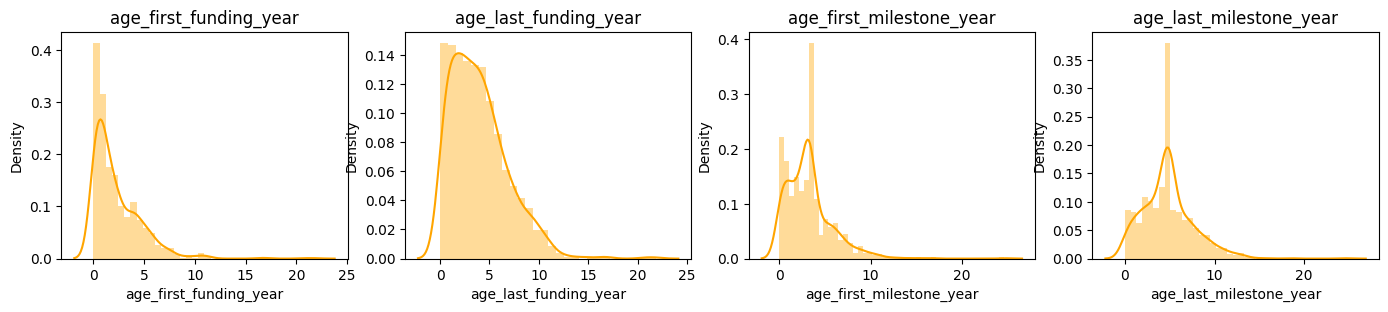

In [23]:
variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(17,3),dpi=100)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    sns.distplot(df[variable[i]], color="orange");
    

In [24]:
from scipy.stats import zscore

zscores=zscore(df["age_first_funding_year"])

for threshold in range(1,8,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))
    print("------------------------")

Threshold value: 1
Number of outliers: 128
------------------------
Threshold value: 2
Number of outliers: 36
------------------------
Threshold value: 3
Number of outliers: 15
------------------------
Threshold value: 4
Number of outliers: 4
------------------------
Threshold value: 5
Number of outliers: 4
------------------------
Threshold value: 6
Number of outliers: 3
------------------------
Threshold value: 7
Number of outliers: 2
------------------------


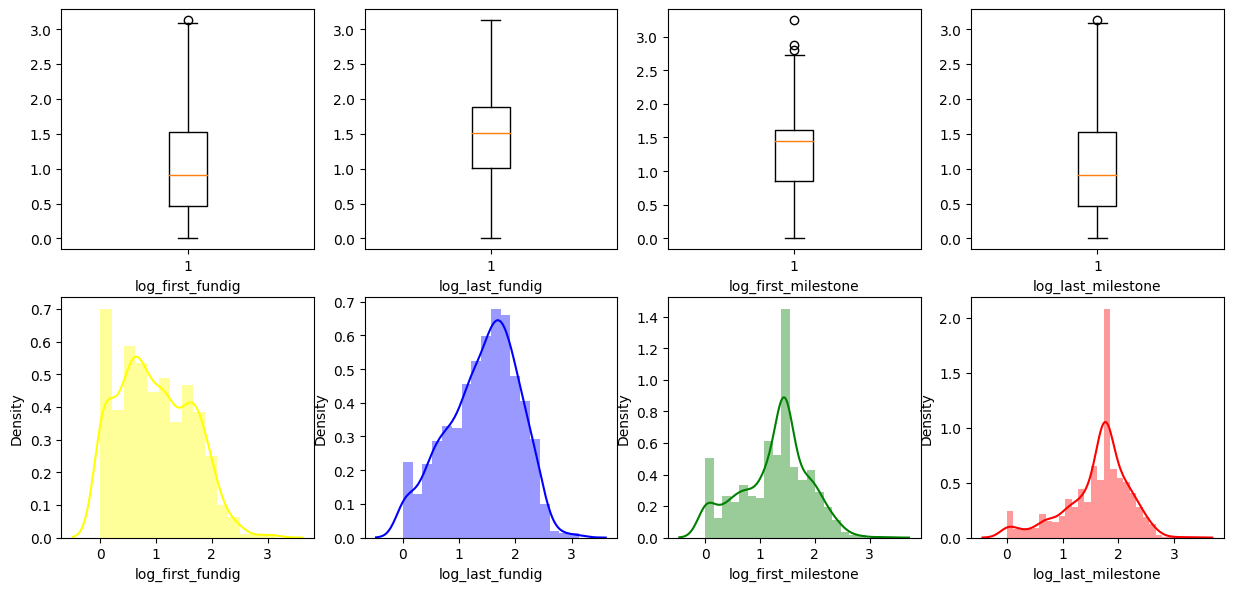

In [26]:
plt.figure(figsize=(15,7),dpi=100)

df["log_first_fundig"]=np.log(df["age_first_funding_year"]+1)
plt.subplot(2,4,1)
plt.xlabel("log_first_fundig")
plt.boxplot(df["log_first_fundig"])   

plt.subplot(2,4,5)
sns.distplot(df["log_first_fundig"] , color="yellow");


df["log_last_fundig"]=np.log(df["age_last_funding_year"]+1)
plt.subplot(2,4,2)
plt.xlabel("log_last_fundig")
plt.boxplot(df["log_last_fundig"])   

plt.subplot(2,4,6)
sns.distplot(df["log_last_fundig"], color="blue")


df["log_first_milestone"]=np.log(df["age_first_milestone_year"]+1)
plt.subplot(2,4,3)
plt.xlabel("log_first_milestone")
plt.boxplot(df["log_first_milestone"])   

plt.subplot(2,4,7)
sns.distplot(df["log_first_milestone"], color="green")


df["log_last_milestone"]=np.log(df["age_last_milestone_year"]+1)
plt.subplot(2,4,4)
plt.xlabel("log_last_milestone")
plt.boxplot(df["log_first_fundig"])   

plt.subplot(2,4,8)
sns.distplot(df["log_last_milestone"], color="red");


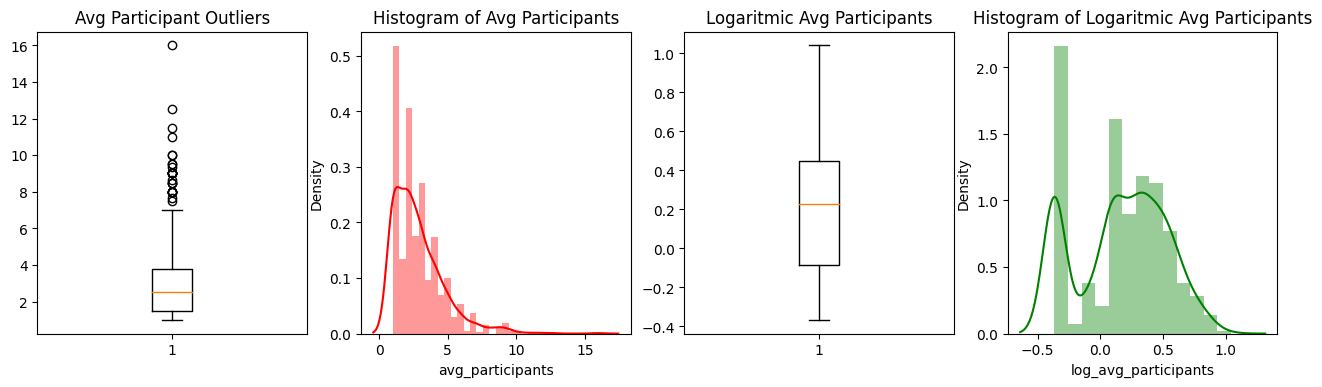

In [28]:
plt.figure(figsize=(16,4),dpi=100)


# "avg_participants"  column has negative value but it shouldn't be, so firstly we should get the absolute of the column
df["avg_participants"]=np.abs(df["avg_participants"])


plt.subplot(1,4,1)
plt.title("Avg Participant Outliers")
plt.boxplot(df["avg_participants"])

plt.subplot(1,4,2)
plt.title("Histogram of Avg Participants")
sns.distplot(df["avg_participants"], color="red")

plt.subplot(1,4,3)
df["log_avg_participants"]=np.log(df["avg_participants"]+1)
plt.title("Logaritmic Avg Participants")
plt.boxplot(np.log(df["log_avg_participants"]))

plt.subplot(1,4,4)
plt.title("Histogram of Logaritmic Avg Participants")
sns.distplot(np.log(df["log_avg_participants"]), color="green");
